In [30]:
# Make jupyter reload functions
%reload_ext autoreload
%autoreload 2

from funcs import * 
from iv_part_id import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plot_funcs import *

In [31]:
results = iv_part_id(
    target="late", 
    identif="iv_slope",
    basis="cs",
    m0_dgp=m0_dgp,
    m1_dgp=m1_dgp,
    u_lo_target=0.35,
    u_hi_target=0.9,
    u_part=np.array([0.35, 0.6, 0.9]),
    supp_z=np.array([0, 1, 2]),
    f_z=np.array([0.5, 0.4, 0.1]),
    prop_z=np.array([0.35, 0.6, 0.7]),
)

c:\Users\budde\OneDrive\phd_bgse\courses\topics_metrics\topics_sim\src\funcs.py:59: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(
c:\Users\budde\OneDrive\phd_bgse\courses\topics_metrics\topics_sim\src\funcs.py:76: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the inte

HiGHS 1.5.1: HiGHS 1.5.1: optimal solution; objective -0.4208873737
0 simplex iterations
0 barrier iterations
Objective is: -0.4208873737373858
argmax:           Theta_val.val
theta0_0       0.000000
theta0_1       1.000000
theta1_0       0.274048
theta1_1       0.000000
HiGHS 1.5.1: HiGHS 1.5.1: optimal solution; objective 0.5003247475
0 simplex iterations
0 barrier iterations
Objective is: 0.5003247474747358
argmax:           Theta_val.val
theta0_0       0.099286
theta0_1       0.000000
theta1_0       0.000000
theta1_1       1.000000


In [32]:
results[0][0]

-0.4208873737373858

In [33]:
beta_lo, beta_hi = results[0][0], results[1][0]
beta_lo, beta_hi

(-0.4208873737373858, 0.5003247474747358)

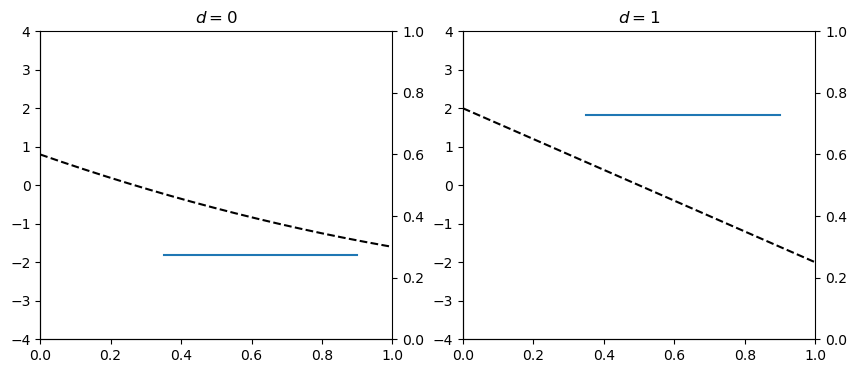

In [34]:
# Replicate figure 1 from the paper

# Compute weights over range u from 0 to 1
u = np.linspace(0, 1, 1000)

# Compute weights
weights = np.zeros((len(u), 2))
for i in range(len(u)):
    weights[i, 0] = s_late(0, u[i], 0.35, 0.9)
    weights[i, 1] = s_late(1, u[i], 0.35, 0.9)

# Set all 0 weights to missing
weights[weights == 0] = np.nan

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot for d=0
axs[0].plot(u, weights[:, 0])
axs[0].set_title("$d=0$")
axs[0].set_xlim(0, 1)
axs[0].set_ylim(-4, 4)

axs0_twin = axs[0].twinx()
axs0_twin.plot(u, m0_dgp(u), color="black", linestyle="--")
axs0_twin.set_ylim(0, 1)
axs0_twin.set_xlim(0, 1)
axs0_twin.spines['right'].set_visible(False)
axs0_twin.spines['top'].set_visible(False)

# Plot for d=1
axs[1].plot(u, weights[:, 1])
axs[1].set_title("$d=1$")
axs[1].set_xlim(0, 1)
axs[1].set_ylim(-4, 4)

axs1_twin = axs[1].twinx()
axs1_twin.plot(u, m1_dgp(u), color="black", linestyle="--")
axs1_twin.set_ylim(0, 1)
axs1_twin.set_xlim(0, 1)
axs1_twin.spines['right'].set_visible(False)
axs1_twin.spines['top'].set_visible(False)

plt.show()


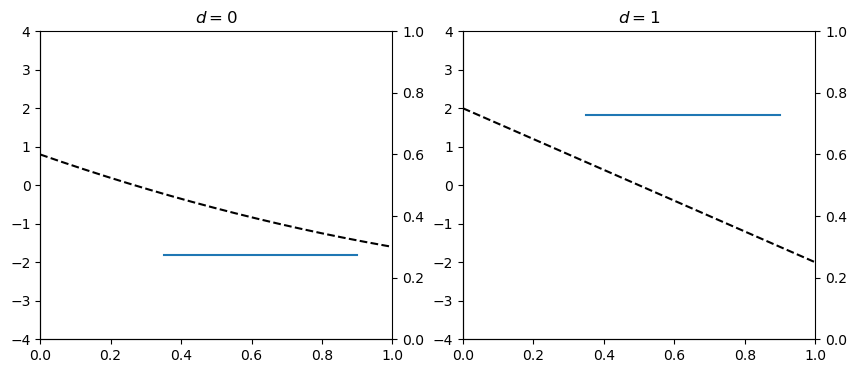

In [35]:
# Figure 2 from the paper
# Replicate figure 1 from the paper

# Compute weights over range u from 0 to 1
u = np.linspace(0, 1, 1000)

# Compute weights
weights = np.zeros((len(u), 2))
for i in range(len(u)):
    weights[i, 0] = s_late(0, u[i], 0.35, 0.9)
    weights[i, 1] = s_late(1, u[i], 0.35, 0.9)

# Set all 0 weights to missing
weights[weights == 0] = np.nan

# TODO compute IV slope weights

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot for d=0
axs[0].plot(u, weights[:, 0])
axs[0].set_title("$d=0$")
axs[0].set_xlim(0, 1)
axs[0].set_ylim(-4, 4)

axs0_twin = axs[0].twinx()
axs0_twin.plot(u, m0_dgp(u), color="black", linestyle="--")
axs0_twin.set_ylim(0, 1)
axs0_twin.set_xlim(0, 1)
axs0_twin.spines['right'].set_visible(False)
axs0_twin.spines['top'].set_visible(False)

# Plot for d=1
axs[1].plot(u, weights[:, 1])
axs[1].set_title("$d=1$")
axs[1].set_xlim(0, 1)
axs[1].set_ylim(-4, 4)

axs1_twin = axs[1].twinx()
axs1_twin.plot(u, m1_dgp(u), color="black", linestyle="--")
axs1_twin.set_ylim(0, 1)
axs1_twin.set_xlim(0, 1)
axs1_twin.spines['right'].set_visible(False)
axs1_twin.spines['top'].set_visible(False)

plt.show()


c:\Users\budde\OneDrive\phd_bgse\courses\topics_metrics\topics_sim\src\funcs.py:59: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(
c:\Users\budde\OneDrive\phd_bgse\courses\topics_metrics\topics_sim\src\funcs.py:76: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the inte

HiGHS 1.5.1: HiGHS 1.5.1: optimal solution; objective -0.4208873737
0 simplex iterations
0 barrier iterations
Objective is: -0.4208873737373858
argmax:           Theta_val.val
theta0_0       0.000000
theta0_1       1.000000
theta1_0       0.274048
theta1_1       0.000000
HiGHS 1.5.1: HiGHS 1.5.1: optimal solution; objective 0.5003247475
0 simplex iterations
0 barrier iterations
Objective is: 0.5003247474747358
argmax:           Theta_val.val
theta0_0       0.099286
theta0_1       0.000000
theta1_0       0.000000
theta1_1       1.000000


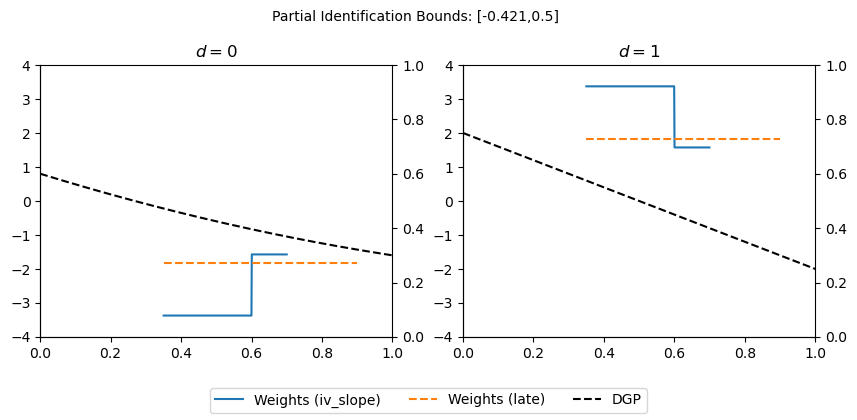

In [36]:
plot_fig(
    target="late", 
    identif="iv_slope",
    basis="cs",
    m0_dgp=m0_dgp,
    m1_dgp=m1_dgp,
    u_lo_target=0.35,
    u_hi_target=0.9,
    u_part=np.array([0.35, 0.6, 0.9]),
    supp_z=np.array([0, 1, 2]),
    f_z=np.array([0.5, 0.4, 0.1]),
    prop_z=np.array([0.35, 0.6, 0.7]),
)